In [435]:
#import all required liabraries
#WE use Box-Cox,log,sqrt Transform technique to remove skewness from columns
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LarsCV,ElasticNet,ElasticNetCV,LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectKBest,f_classif
from scipy.stats import zscore
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [436]:
#convert .csv file into DataFrame format 
file=r'C:\Users\Ashish\Desktop\Datasets\avocado.csv'


#read.csv file
df = pd.read_csv(file, sep = ',', encoding='utf-8-sig', usecols= ['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags',
                                                                 'Small Bags','Large Bags','XLarge Bags','type','year','region'])    
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [437]:
#Duplicate Removal
df.drop_duplicates(inplace=True)
df.shape

(18249, 15)

#There is no duplicates in given data

In [438]:
#Shape of DF
df.shape

(18249, 15)

In [439]:
# #check the null values are available or not in data set as well as the data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 15 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
Month           18249 non-null int64
Day             18249 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(3), object(2)
memory usage: 2.2+ MB


No null Values are there

In [440]:
#Drop Date Column We already had Bifurcate date into day ,year,months
df=df.drop(columns = ['Date'], axis = 1)

In [441]:
#for convert the object we use encoder for column "type" and "region"
comman_encod=LabelEncoder()

#Encode the Attrition from object to int
df['type'] = comman_encod.fit_transform(df['type'])
df['region'] = comman_encod.fit_transform(df['region'])

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 14 columns):
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null int32
year            18249 non-null int64
region          18249 non-null int32
Month           18249 non-null int64
Day             18249 non-null int64
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.9 MB


In [444]:
df.describe(include="all")

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000,31.000000


#### OBESRVATION:
    
There is no missing values as well as no Null Values in given dataset.
further observation we'll see in graphs

In [445]:
#Find the skewness of column
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

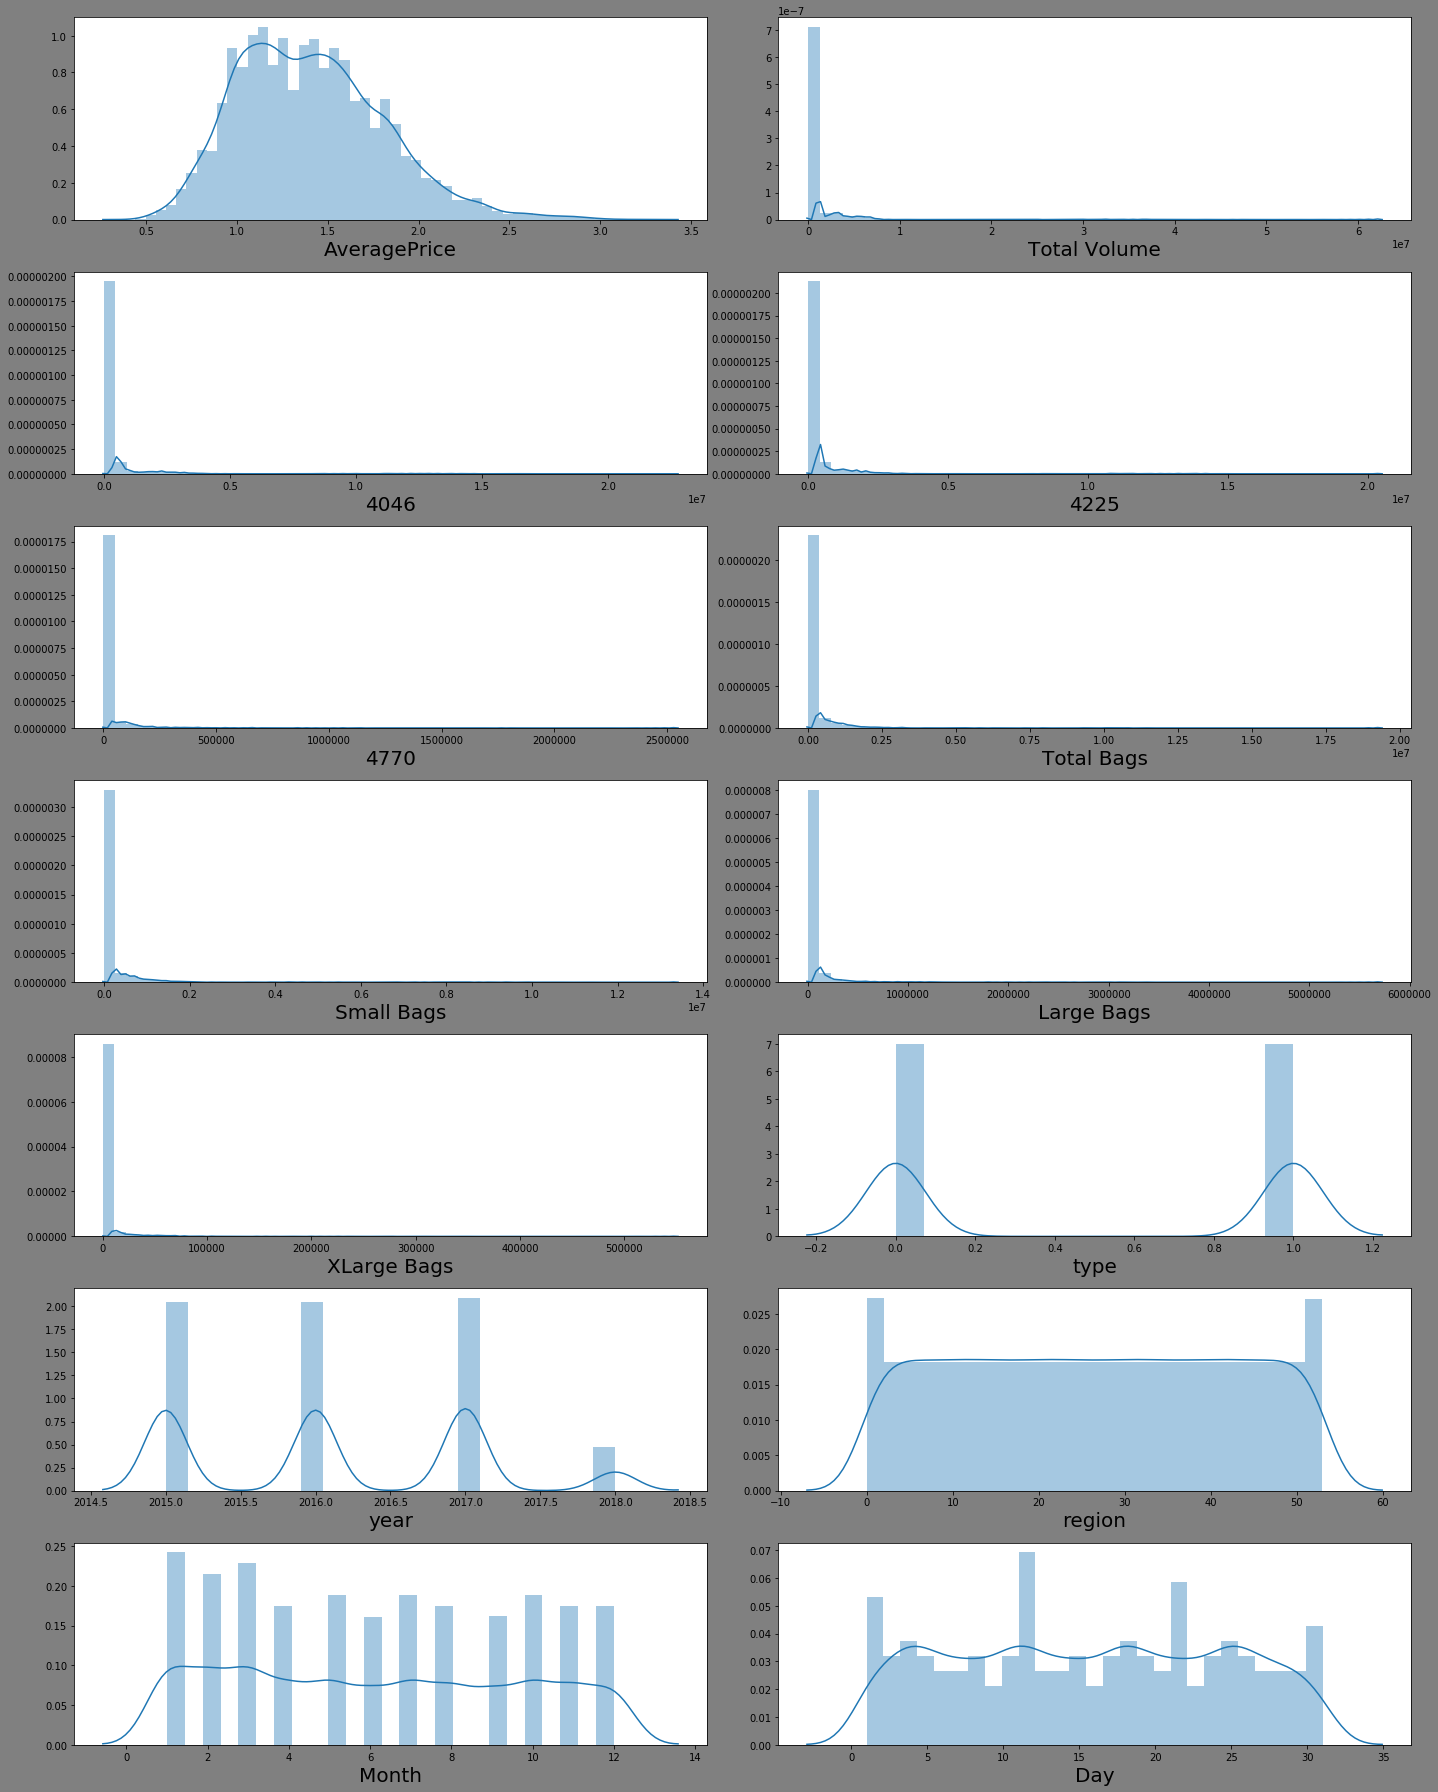

In [402]:
#let see how data is distribute in every column Before removing the skewness

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [446]:
print("Zero's in 4046 :",(df['4046']==0).sum(),"In Percen.",((df['4046']==0).sum()/18249*100),"%")
print("Zero's in Total Volume :",(df['Total Volume']==0).sum(),"In Percen.",((df['Total Volume']==0).sum()/18249*100),"%")
print("Zero's in 4225 :",(df['4225']==0).sum(),"In Percen.",((df['4225']==0).sum()/18249*100),"%")
print("Zero's in 4770 :",(df['4770']==0).sum(),"In Percen.",((df['4770']==0).sum()/18249*100),"%")
print("Zero's in Small Bags :",(df['Small Bags']==0).sum(),"In Percen.",((df['Small Bags']==0).sum()/18249*100),"%")
print("Zero's in Large Bags :",(df['Large Bags']==0).sum(),"In Percen.",((df['Large Bags']==0).sum()/18249*100),"%")
print("Zero's in XLarge Bags :",(df['XLarge Bags']==0).sum(),"In Percen.",((df['XLarge Bags']==0).sum()/18249*100),"%")
print("Zero's in Total Bags :",(df['Total Bags']==0).sum(),"In Percen.",((df['Total Bags']==0).sum()/18249*100),"%")

Zero's in 4046 : 242 In Percen. 1.3261000602772754 %
Zero's in Total Volume : 0 In Percen. 0.0 %
Zero's in 4225 : 61 In Percen. 0.33426489122691655 %
Zero's in 4770 : 5497 In Percen. 30.12219847662886 %
Zero's in Small Bags : 159 In Percen. 0.8712806181160611 %
Zero's in Large Bags : 2370 In Percen. 12.987012987012985 %
Zero's in XLarge Bags : 12048 In Percen. 66.02005589347361 %
Zero's in Total Bags : 15 In Percen. 0.08219628472793031 %


###### Observation:
   Out of 18249 Rows we find the no. of zeros in column in % In XLarge Bags Count of Zero's is >50% of total values which not make sense .So Drop XLarge Bags from data set

In [447]:
#Droping XLarge Bag column
df=df.drop(columns = ['XLarge Bags'])

In [448]:
#By applying  log1p stat method remove skewness from columns 


df['4046'] = np.log1p(df['4046'])
df['4225'] = np.log1p(df['4225'])
df['4770'] = np.log1p(df['4770'])
df['Total Bags'] = np.log1p(df['Total Bags'])
df['Small Bags'] = np.log1p(df['Small Bags'])
df['Total Volume'] = np.log1p(df['Total Volume'])
df['Large Bags'] = np.log1p(df['Large Bags'])
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

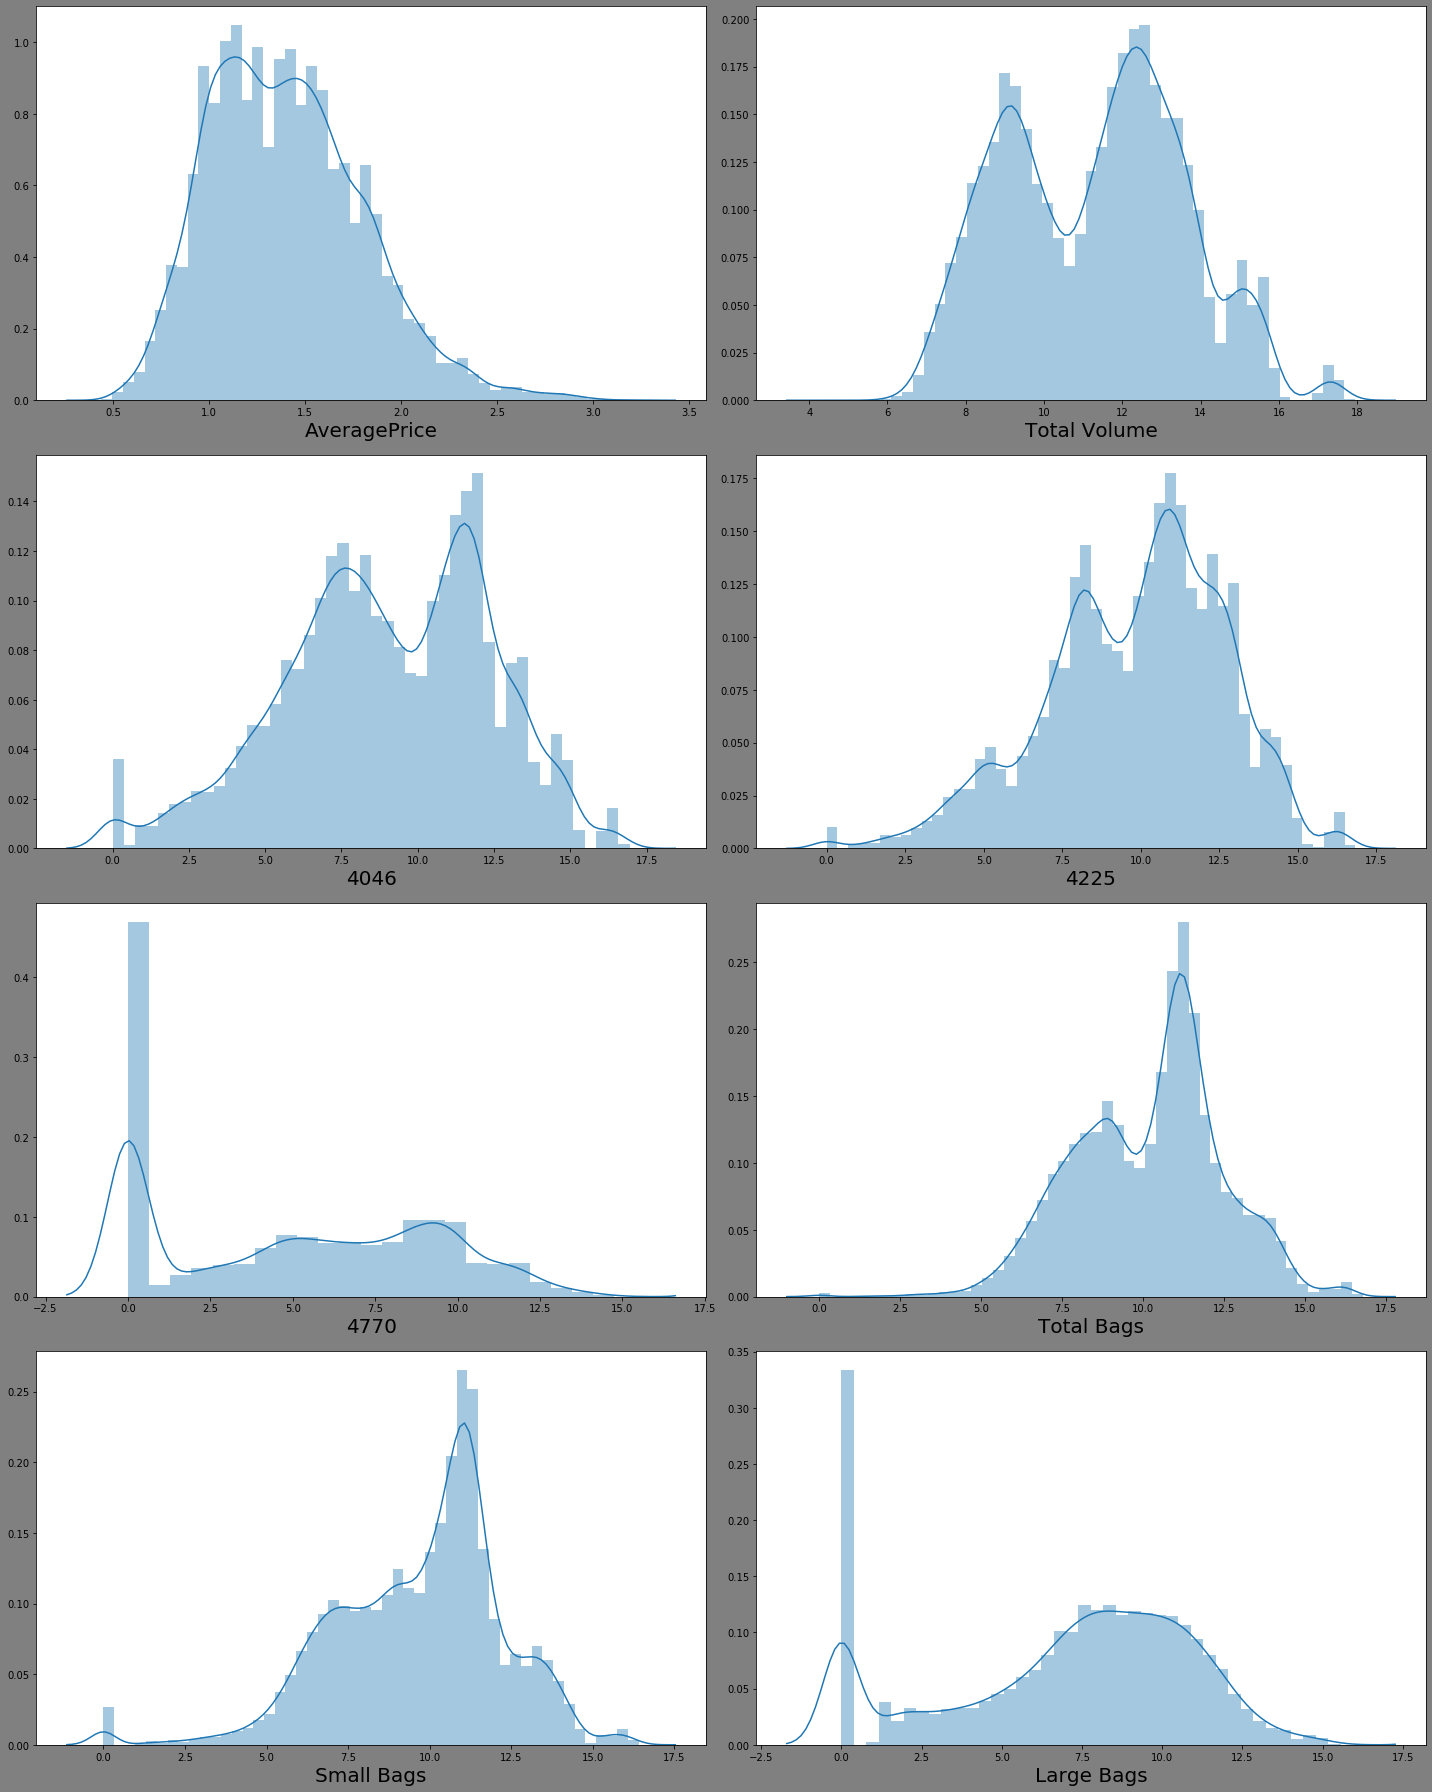

In [205]:
#let see how data is distribute in every column after removing the skewness

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [359]:
# #Zero values in column 4046
# print("Zero's in 4046 :" ,(df['4046']==0).sum(axis=0))
# print("Median value of 4046 :",(df['4046'].median()))

Zero's in 4046 : 242
Median value of 4046 : 9.064886762751913


In [360]:
# df['4046'] = df['4046'].replace(0,9.07)

In [361]:
# #Zero values in column 4770
# print("Zero's in 4770 :" ,(df['4770']==0).sum(axis=0))
# print("Median value of 4770 :",(df['4770'].median()))

Zero's in 4770 : 5497
Median value of 4770 : 5.225692908827035


In [362]:
# df['4770'] = df['4770'].replace(0,5.22)

In [363]:
# #Zero values in column 4770
# print("Zero's in Large Bags :" ,(df['Large Bags']==0).sum(axis=0))
# print("Median value of Large Bags :",(df['Large Bags'].median()))

Zero's in Large Bags : 2370
Median value of Large Bags : 7.8818280080055265


In [364]:
# df['Large Bags'] = df['Large Bags'].replace(0,7.881559917056899)

In [449]:
#for convert the object we use encoder for column "type" and "region"
comman_encod=LabelEncoder()

#Encode the Type from object to int
df['type'] = comman_encod.fit_transform(df['type'])

#Encode the Region from object to int
df['region'] = comman_encod.fit_transform(df['region'])

In [450]:
#convert Dtypes from float to int
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
type              int64
year              int64
region            int64
Month             int64
Day               int64
dtype: object

### Visualize features by using distplot

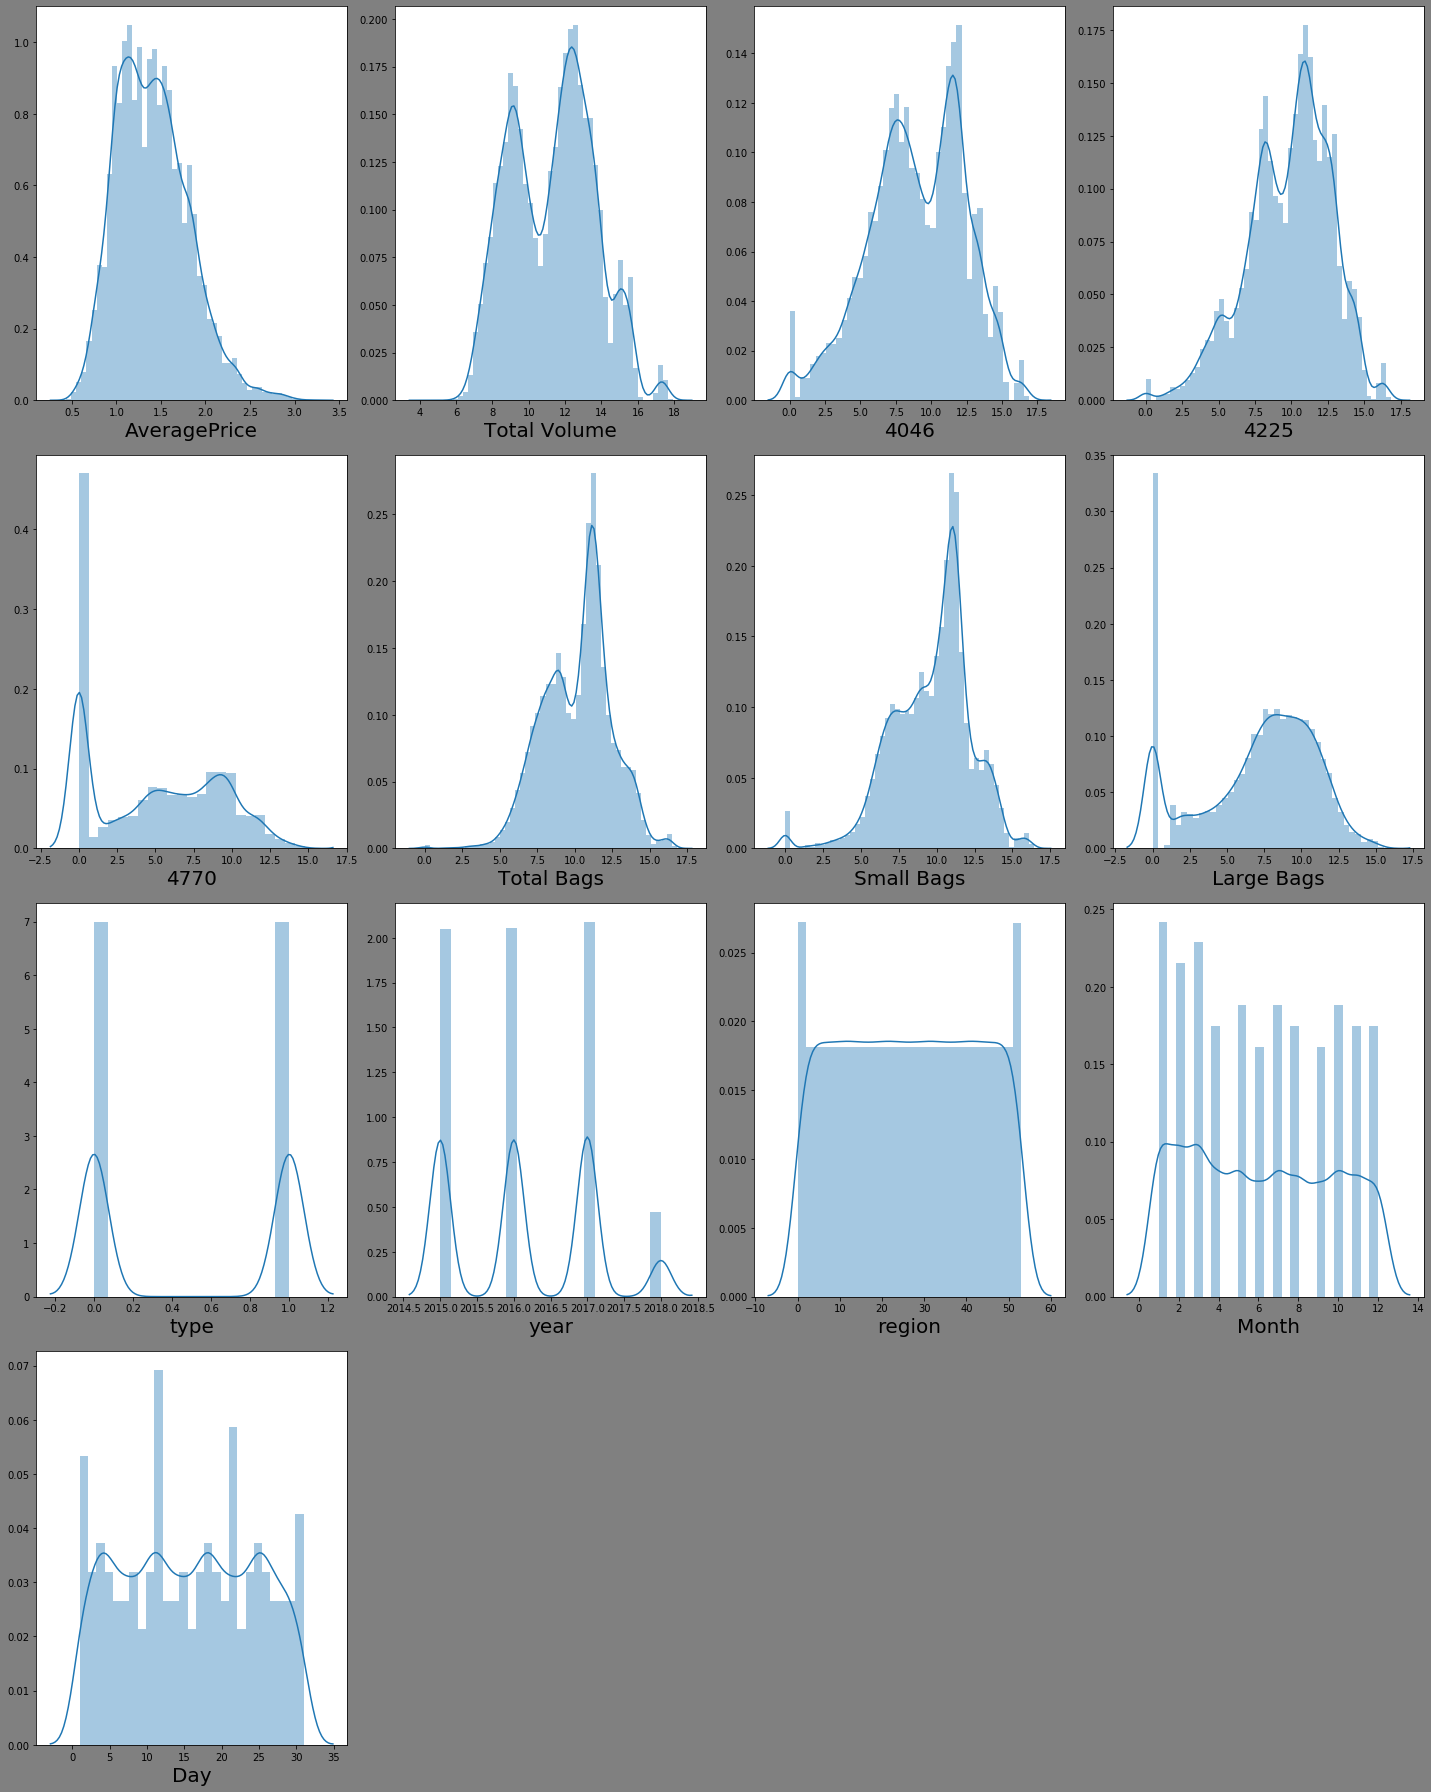

In [408]:
#let see how data is distribute in every column after replacing zeros with median valuesof that column

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Visualize features by using boxtplot

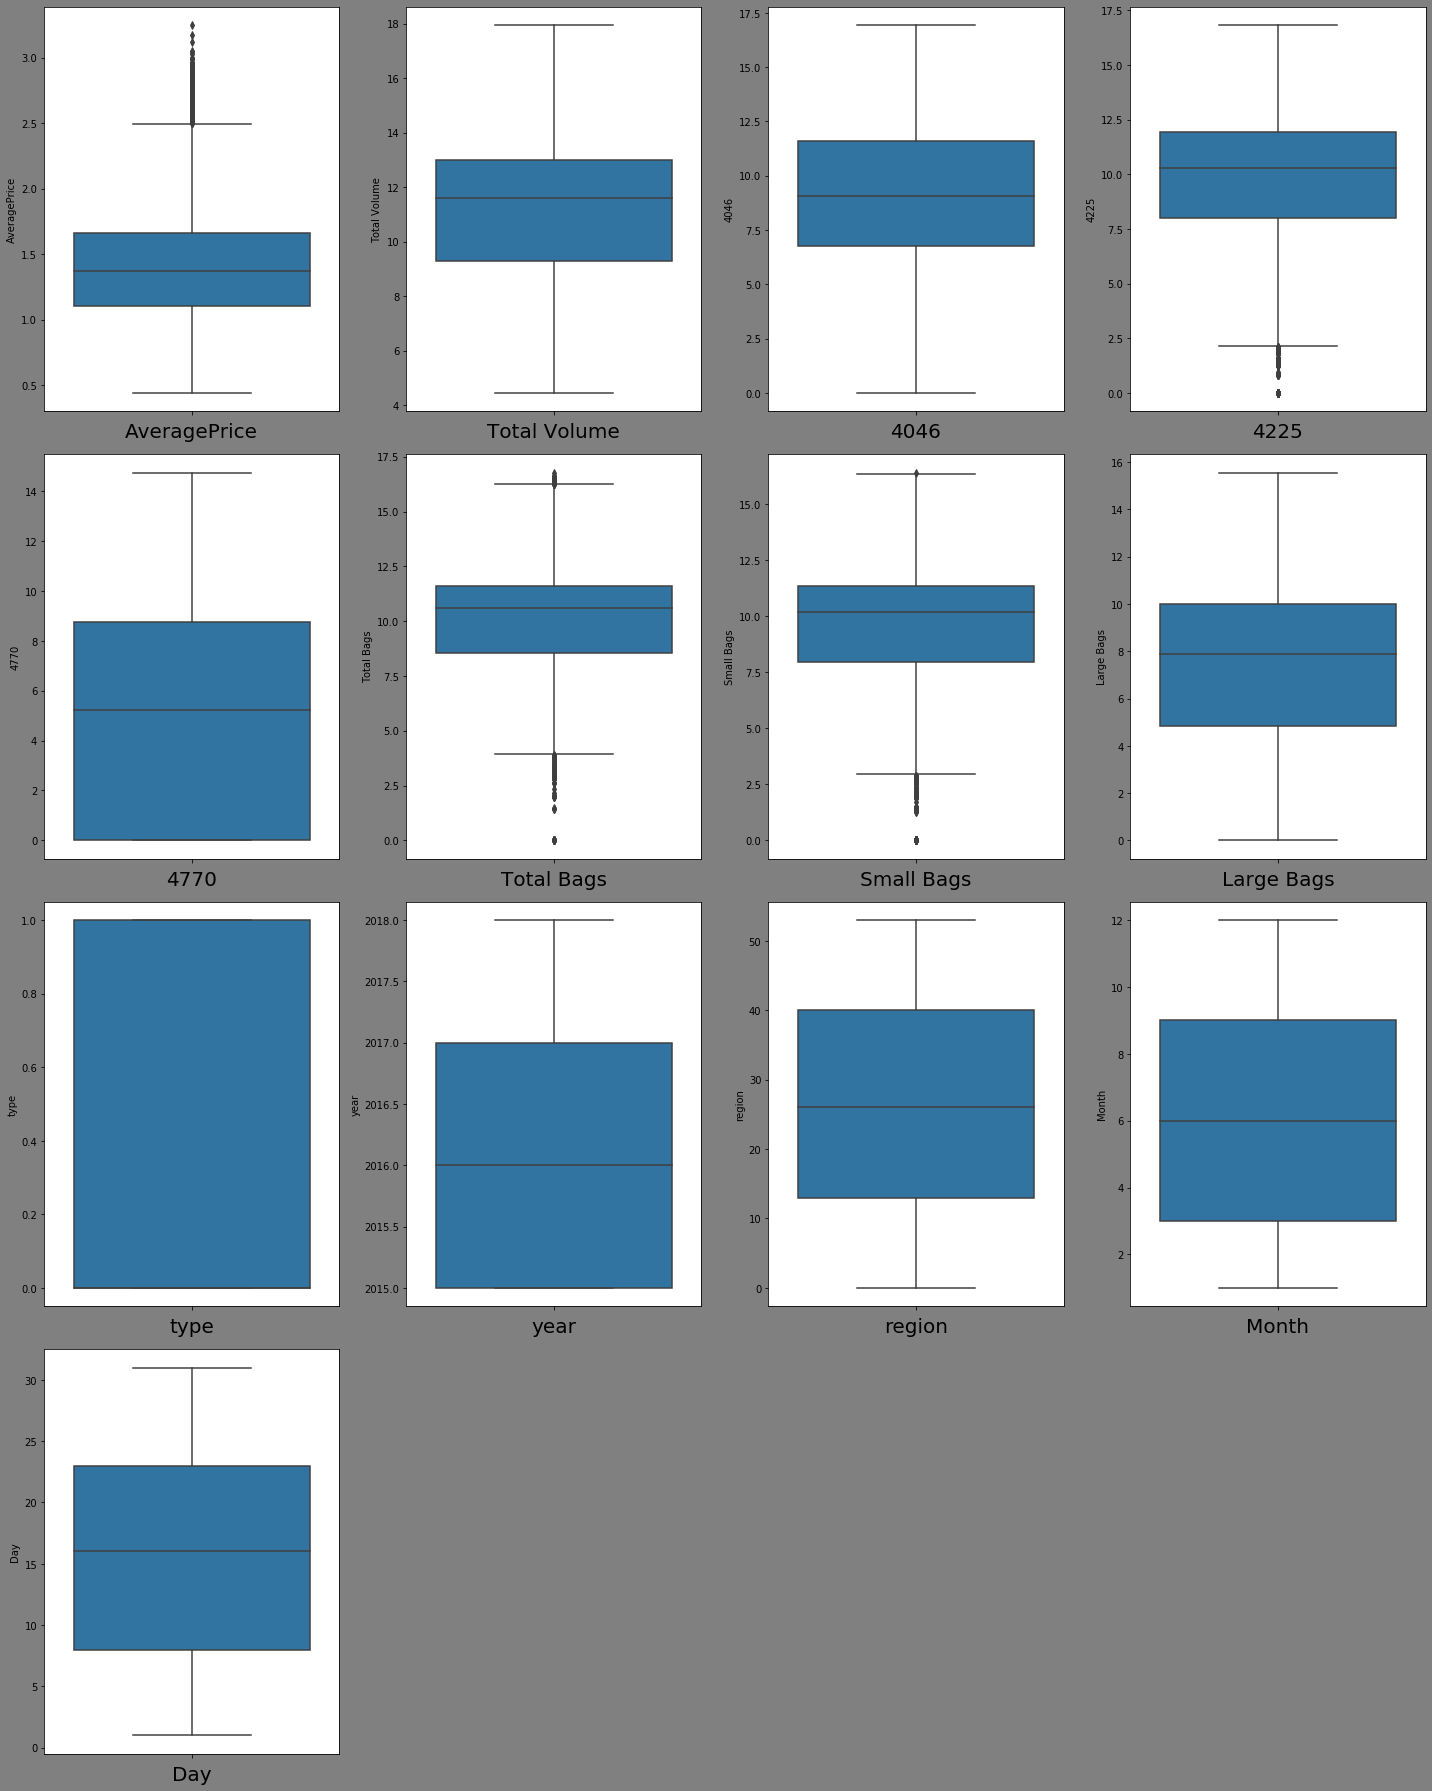

In [409]:
#detecting outliers

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [410]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

##### Remove ouotlier by using IQR method

In [451]:
#We'll find the IQR to identify outlier

#1st quantile
q1 = df.quantile(0.25)

#3rd quantile
q3 = df.quantile(0.75)

#IQR
iqr = q3 - q1

In [452]:
#Removing Outlier Using IQR Method
df_new = df[~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)]

In [453]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new.shape)
print("Precentage of data loss".ljust(20),":",(100-((df_new.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (18249, 13)
shape after          : (17592, 13)
Precentage of data loss : 3.6001972710833456 %


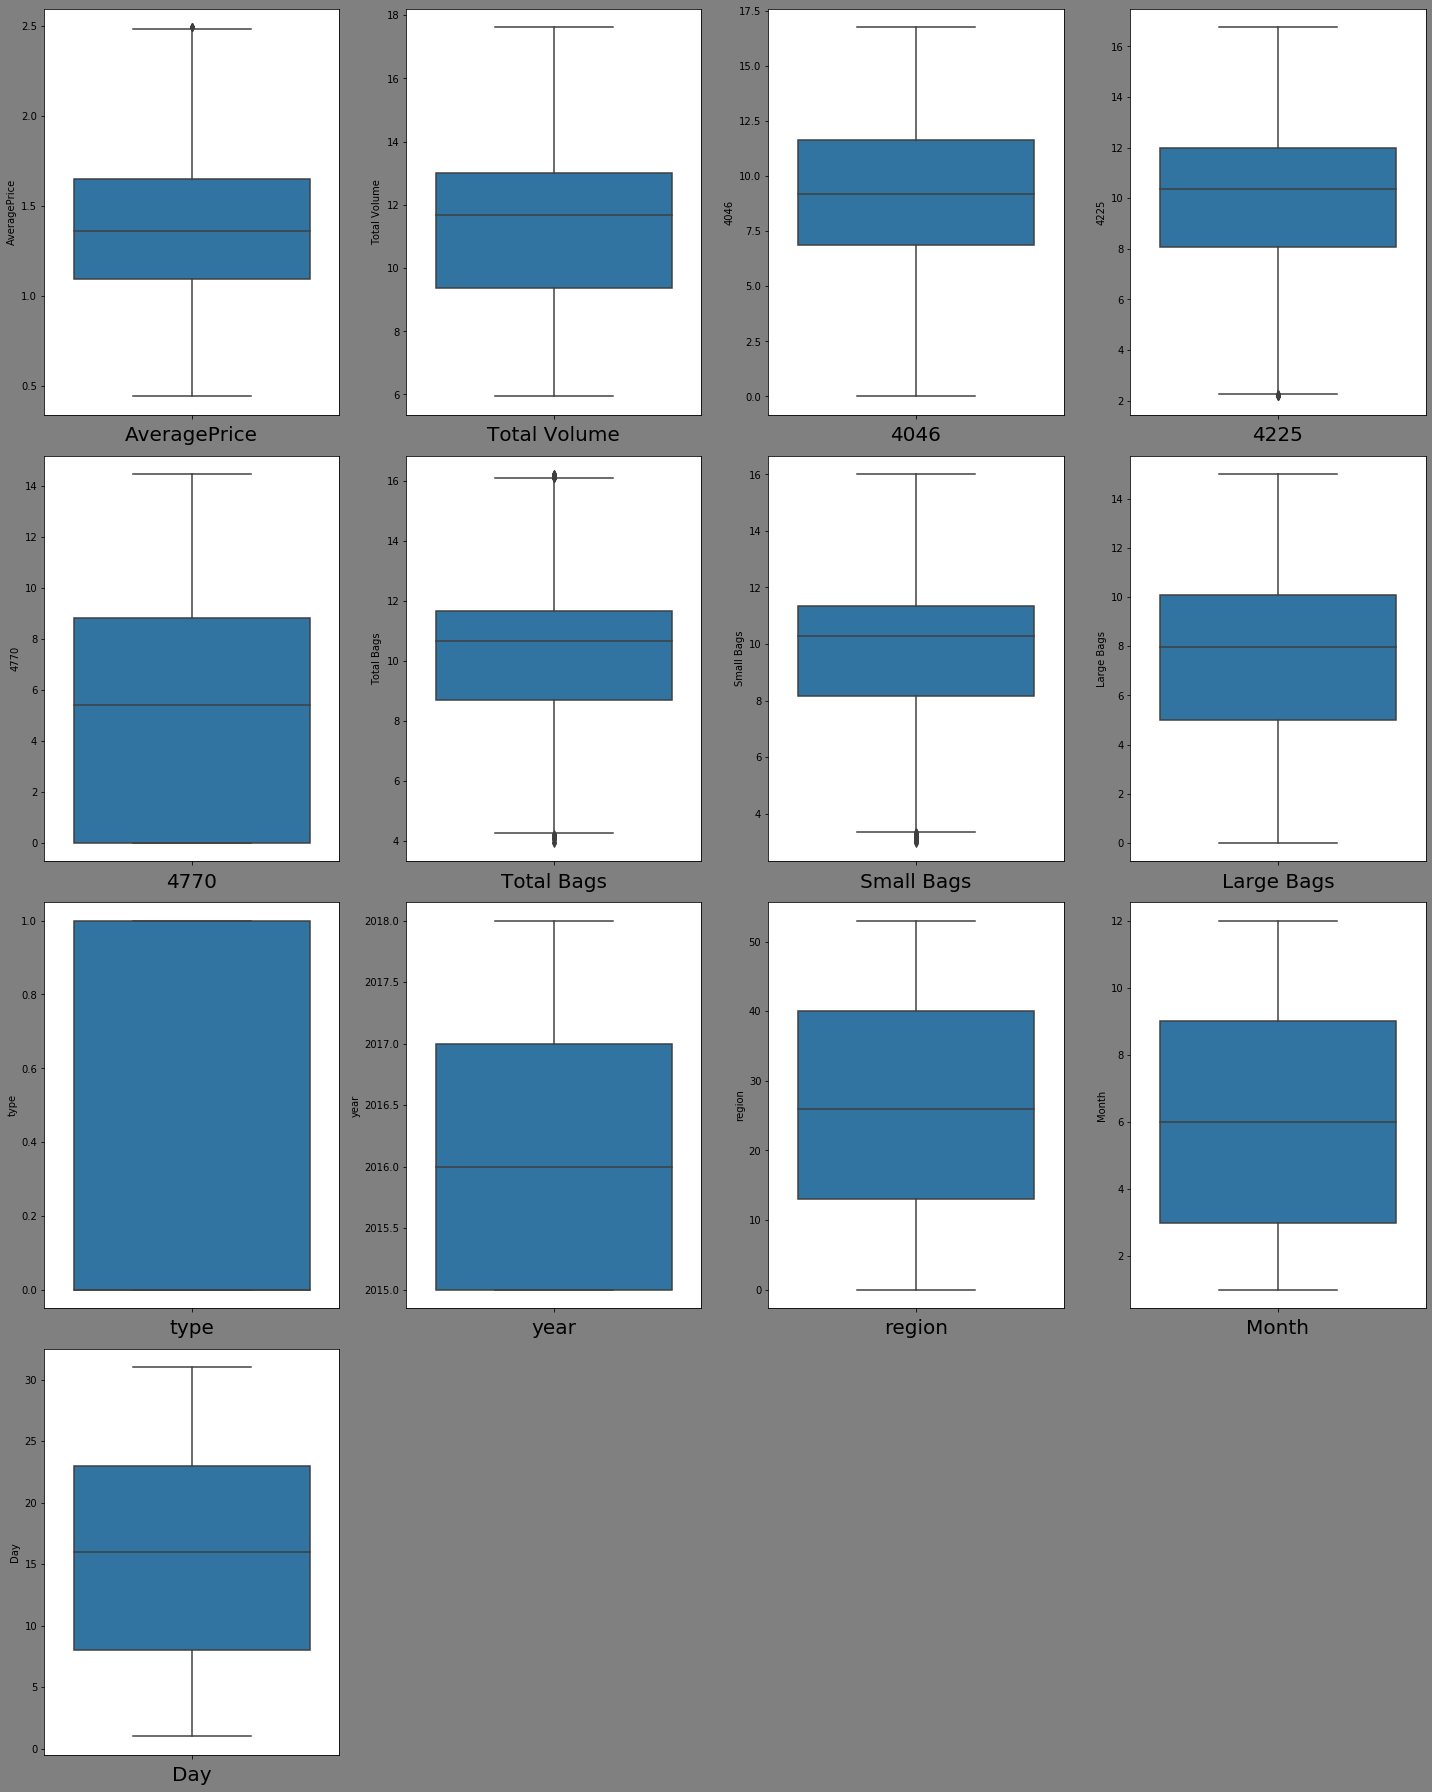

In [414]:
#let see how data is distribute in every column afte removing outliers by using IQR method

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df_new:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### OBSERVATION:
    BY using IQR method we are lossing 3.6% data.

#### Remove outlier by using Z_ Score 

In [454]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
df_new_z = df[(z<3).all(axis = 1)]

In [455]:
print("shape Before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new_z.shape)
print("Precentage of data loss".ljust(20),":",(100-((df_new_z.shape[0]/df.shape[0])*100)),"%")

shape Before and after
shape before         : (18249, 13)
shape after          : (17840, 13)
Precentage of data loss : 2.241218696914899 %


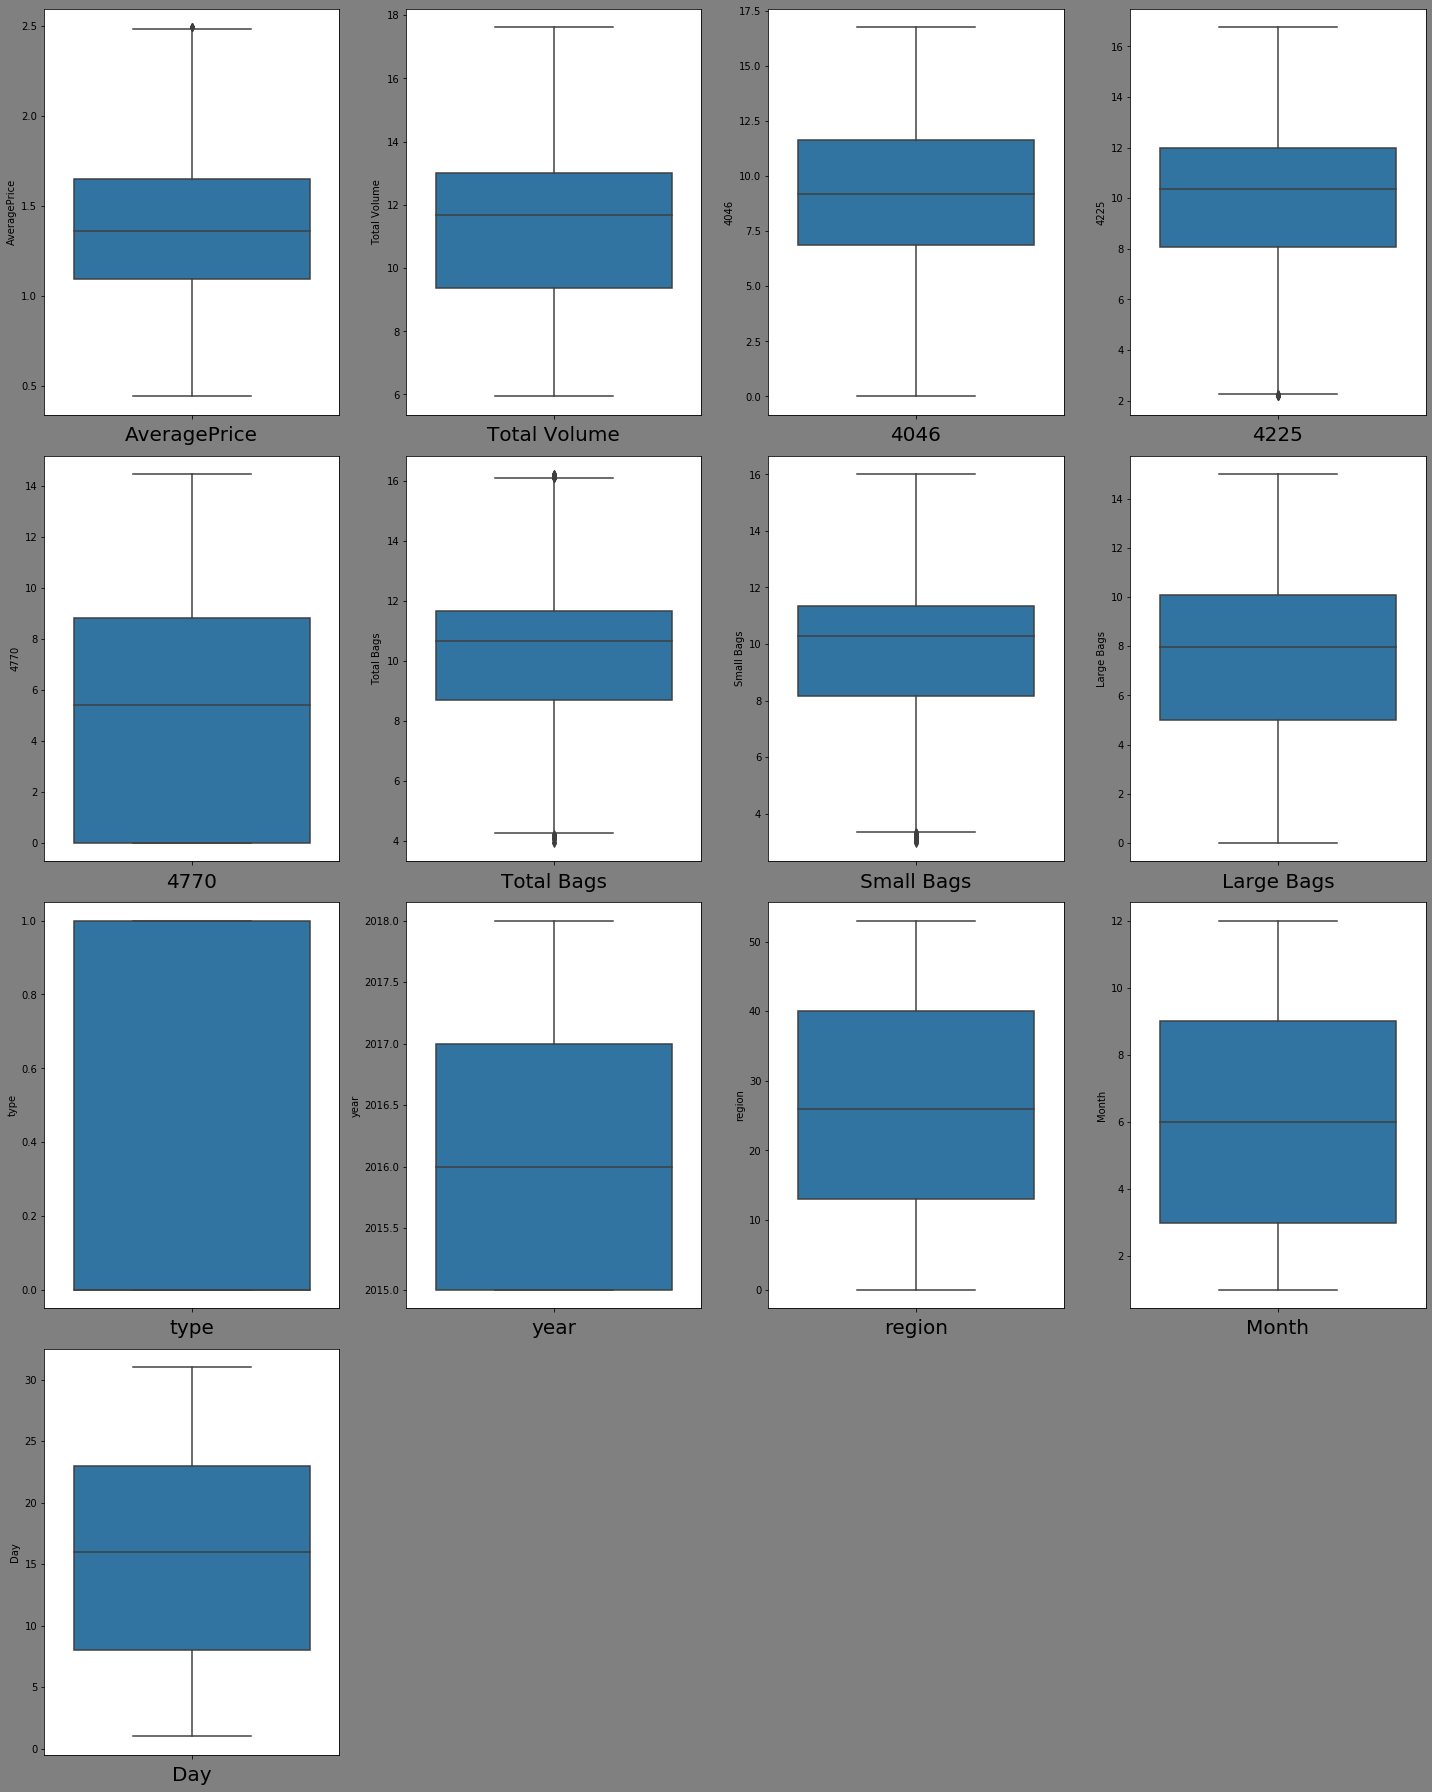

In [417]:
#let see how data is distribute in every column after removing the outliers by using Z Score method

plt.figure(figsize=(20,25),facecolor="grey")
plotnumber=1

for column in df_new:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#Here we are loosing 2.24% of data

In [418]:
# #O/P variable
# y = df_new_z['AveragePrice']

# #Droping categorical  features/independant variable 
# x=df_new_z.drop(columns = ['AveragePrice'], axis = 1)

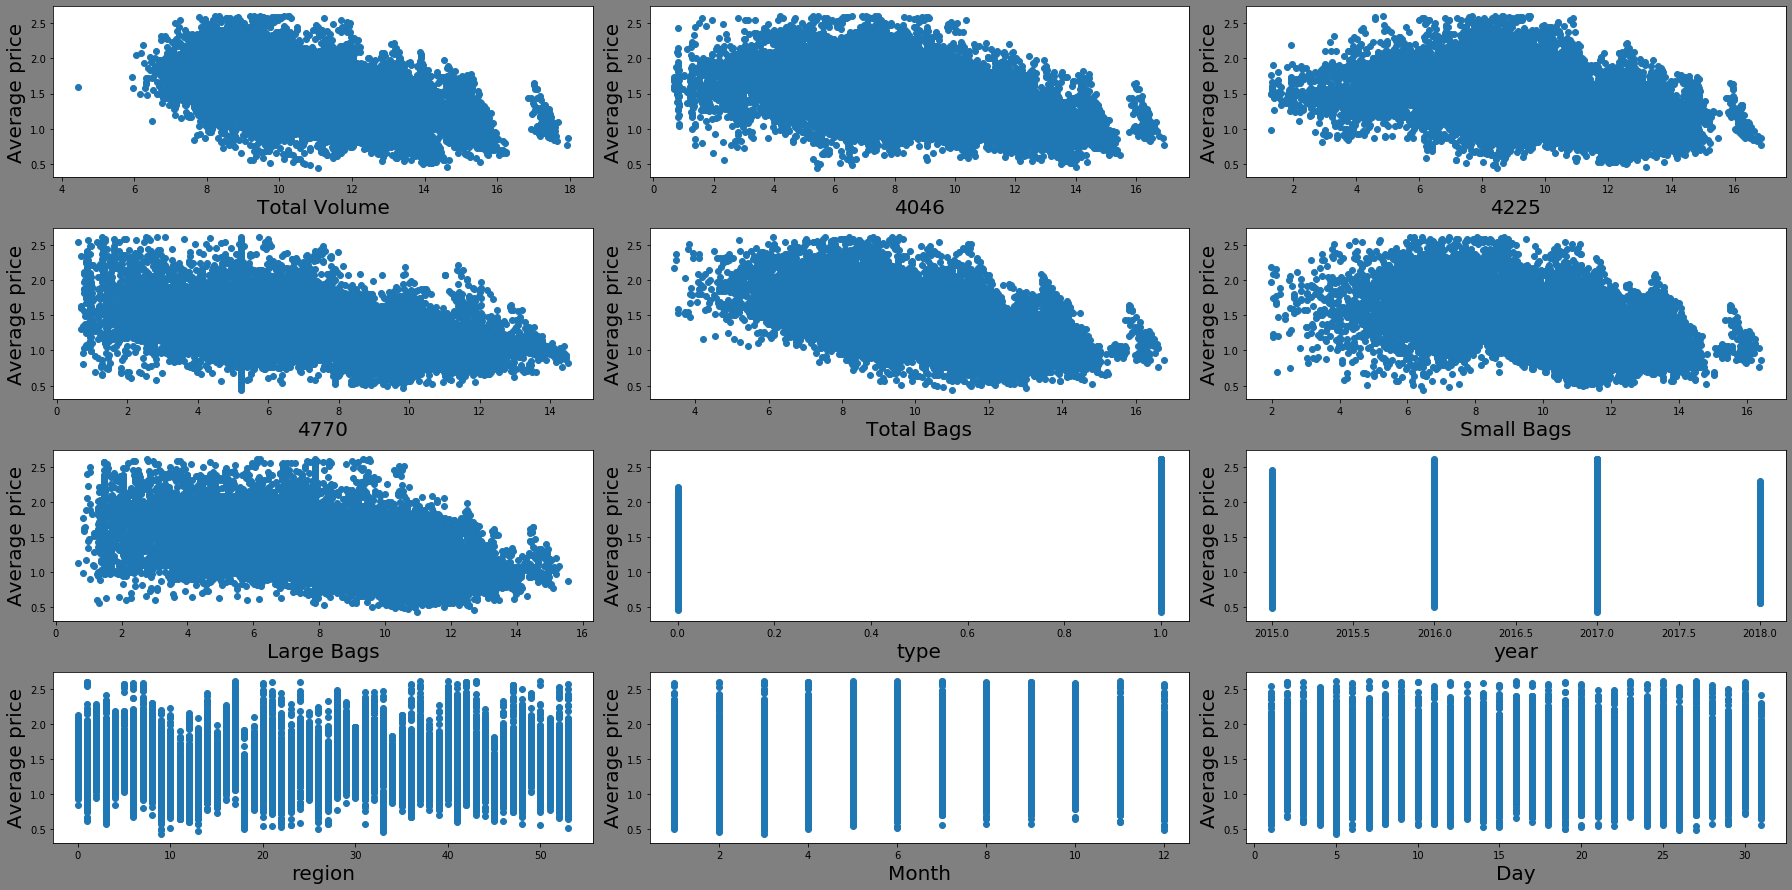

In [419]:
#visualizing relation ship

plt.figure(figsize=(25,15),facecolor="grey")
plotnumber=1

for column in x:
    if plotnumber <=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average price',fontsize=20)
    plotnumber+=1
plt.tight_layout() 

### Initial Observation After Pre-Procesing :

1) Average Price VS Year :- Sale of avacado in high in 2016 & 2017
2) Average Price VS Type :- Comaretevley 1(Organic) is more purchesed than 0(conventional)
3) Average Price VS Type :- Sale is high in above months in year .(March,April,August,Sep. ,Oct.)

## Apply Algorithm

Note :- Our target variable is contenious so we have to apply regression algo's.

In [458]:
#After removing outliers by using IQR method

#O/P variable
y = df_new['AveragePrice']

#Droping categorical 
x=df_new.drop(columns = ['AveragePrice'], axis = 1)# features/independant variable 

In [459]:
print(y.shape)
print(x.shape)

(17592,)
(17592, 12)


In [460]:
#Scaled the data So all Data points will come in 1 range.
scalar=StandardScaler()
x_Scaled=scalar.fit_transform(x)

In [461]:
x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,random_state =311,test_size = 0.17)
reg=KNeighborsRegressor()
reg.fit(x_train,y_train)
predect = reg.predict(x_test)
R2_score = r2_score(y_test,predect)
print(R2_score*100)

81.40209847078617


In [462]:
# #we'll find the parameter for predection of KNeighborsRegressor algorithm using GridSearchCV
# x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,random_state =311,test_size = 0.17)
# KN = KNeighborsRegressor()
# parameters = {'n_neighbors': range(1,12),'leaf_size':range(1,30)}
# gridsearch = GridSearchCV(estimator = KN,n_jobs = 1,param_grid = parameters)
# gridsearch.fit(x_train,y_train)
# gridsearch.best_params_

{'leaf_size': 1, 'n_neighbors': 4}

In [463]:
# #As per Gridsearch cv given Parameters with {'leaf_size': 1, 'n_neighbors': 4}
# x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,random_state =311,test_size = 0.17)
# reg=KNeighborsRegressor(leaf_size= 1,n_neighbors=4)
# reg.fit(x_train,y_train)
# predect = reg.predict(x_test)
# R2_score = r2_score(y_test,predect)
# print(R2_score*100)

80.81971711387607


In [464]:
print("MAE : ",mean_absolute_error(y_test,predect))
print("MSE :",mean_squared_error(y_test,predect))
print("RMAE :",np.sqrt(mean_absolute_error(y_test,predect)))

MAE :  0.12070795720494819
MSE : 0.027816535021731863
RMAE : 0.3474305070153572


In [433]:
# #Let's using Bagging over our KNN classifier and see if our score improves:
# bagg_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors = 4,leaf_size = 1),
#                            n_estimators = 20,max_samples = 0.5,bootstrap = True,random_state = 311,oob_score = False)

In [465]:
# bagg_knn.fit(x_train,y_train)
# predect = bagg_knn.predict(x_test)
# R2_score = r2_score(y_test,predect)
# print(R2_score*100)

In [467]:
# #Let's using Bagging over our KNN classifier and see if our score improves:
# bagg_knn = BaggingRegressor(KNeighborsRegressor(n_neighbors = 5,leaf_size = 5),
#                            n_estimators = 20,max_samples = 0.5,bootstrap = False,random_state = 311,oob_score = False)

In [469]:
# bagg_knn.fit(x_train,y_train)
# predect = bagg_knn.predict(x_test)
# R2_score = r2_score(y_test,predect)
# print(R2_score*100)

Text(0, 0.5, 'predect')

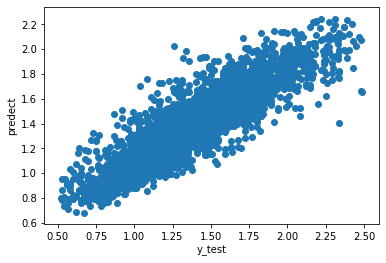

In [470]:
#Diff. between actual and pred. value
plt.scatter(x=y_test,y=predect)
plt.xlabel('y_test')
plt.ylabel('predect')

# Final Observation:

BY applying Different algorithms and different ensembling techniques on given data we Came on conclusion that
the sutible model for prediction is KNeighborsRegressor() In which we are geeting higher R2_Score which is 81.40%

1) Not Replacing of zeros in columns is influence our R2 Score by -0.20%  

2) Model without replacing zeros with 3.6% of data loss with default parameters of KNeighborsRegressor algorithm help to achieve 81.40% of R2 score.

3) By applying the taste size from 0.17 to 0.25 in different algorithms on cleaned data. We are not getting R2-Score > 81.40% which we are achieving with KNeighborsRegressor().

4) Data loss of 2.24% with Z_Score outlier removal method  is not help us a lot for achieving good R2 Score, even though we go with less data loss without replacing zeros in columns we are getting 81.18%  with GridSearchCV  81.04% R2 Score and with replacing zeros we are getting 79.23% with GridSearchCV   79.31%  R2 Score respectively.

5) By using other Regression techniques we are getting R2 Score as per following:
1.	DecisionTreeRegressor  - 77.03%
2.	LinearRegression       - 56.87%
3.	AdaBoostRegressor      - 56.38%   
4.	GridSearchCV             80.81%  


6) After finalizing the model KNeighborsRegressor  for more accuracy trying that with BaggingRegressor.
   Without Bootstrap  - 80.14%
   With Bootstrap – 79.09%


In [472]:
#after reaching on maximum accurecy of model we have to save the model
import pickle

In [473]:
filename='finalmodel.pickle'
pickle.dump(KNeighborsRegressor,open(filename,'wb'))

#prediction using saved model
loaded_model = pickle.load(open(filename, 'rb'))